# Linear Regression Example

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [2]:
datos = pd.read_excel('spy.xlsx',sheet_name='spy',index_col='Dates')

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 543 entries, 2018-06-19 to 2020-07-16
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AAPL_Price   543 non-null    float64
 1   SPY_Price    543 non-null    float64
 2   AAPL_return  543 non-null    float64
 3   SPY_return   543 non-null    float64
dtypes: float64(4)
memory usage: 21.2 KB


In [4]:
print(datos.AAPL_return.shape)
print(datos.SPY_return.shape)

(543,)
(543,)


In [5]:
aapl_train = datos.AAPL_return[:-100]
aapl_test = datos.AAPL_return[-100:]

In [6]:
spy_train = datos.SPY_return[:-100]
spy_test = datos.SPY_return[-100:]

In [7]:
# Create linear regression object
regression = linear_model.LinearRegression()

# Train the model using the training sets
regression.fit(aapl_train.values.reshape(len(aapl_train),1), 
               spy_train.values.reshape(len(spy_train),1))

# Make predictions using the testing set
spy_pred = regression.predict(aapl_test.values.reshape(len(aapl_test),1))

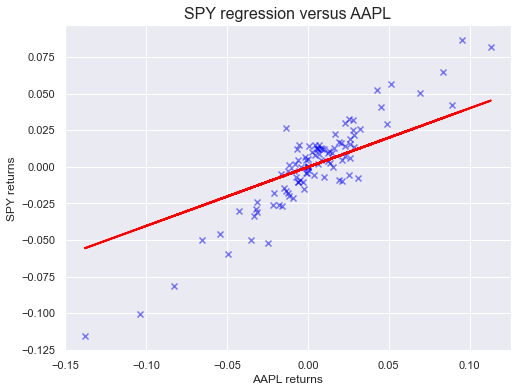

Regression Coefficients: 
 [[0.40216755]]
Mean squared error: 0.00
Coefficient of determination: 0.64


In [8]:
# Plot outputs
plt.figure(figsize=(8,6))
plt.scatter(aapl_test, spy_test, marker='x', color='blue',alpha=.5,edgecolors='white')
plt.plot(aapl_test, spy_pred, color='red', linewidth=2,alpha=1)
plt.title('SPY regression versus AAPL',fontsize =16)
plt.xlabel('AAPL returns',fontsize= 12)
plt.ylabel('SPY returns',fontsize= 12)
plt.grid(True)
plt.show()

# The coefficients
print('Regression Coefficients: \n', regression.coef_)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(spy_test, spy_pred))


# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(spy_test, spy_pred))